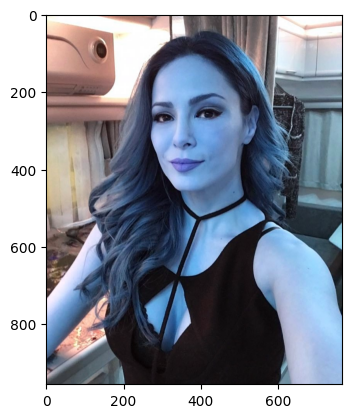

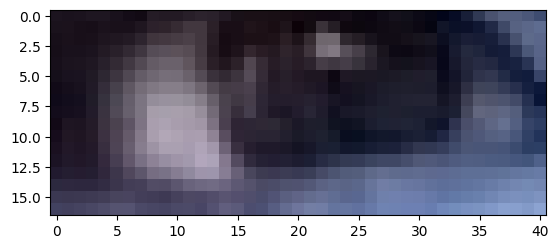

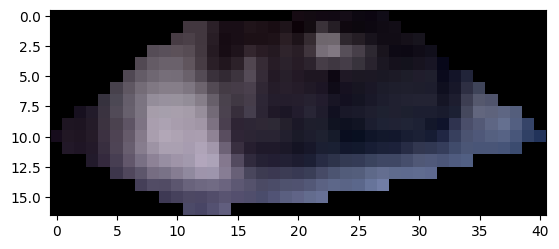

: 

In [5]:
import cv2
import dlib
import numpy as np

# Resmin yüklenmesi ve gri tonlamaya dönüştürülmesi
img = cv2.imread("mine.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Yüz dedektörü ve işaretleyicinin oluşturulması
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Yüzlerin tespiti
faces = detector(gray)

# Yüz işaretleyicileri ve maskelenme işlemi
for face in faces:
    landmarks = predictor(gray, face)
    points = []
    for i in range(36, 42):  # Göz bölgesi için işaretleyiciler
        points.append([landmarks.part(i).x, landmarks.part(i).y])
    mask = np.zeros(img.shape[:2], dtype=np.uint8)
    cv2.fillPoly(mask, [np.array(points)], 255)
    res = cv2.bitwise_and(img, img, mask=mask)

    # Göz bölgesinin kesilmesi
    x, y, w, h = cv2.boundingRect(np.array(points))
    res = res[y:y+h, x:x+w]
    cropped_image = img[y:y+h, x:x+w]

# Sonuçların görüntülenmesi
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()
plt.imshow(cropped_image)
plt.show()
plt.imshow(res)
plt.show()

In [3]:
import cv2
import dlib

# Yüz dedektörü ve yüz işaretleyici yükleniyor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Kamera açılıyor (0: dahili, 1: harici)
cap = cv2.VideoCapture(0)

while True:
    # Kamera çerçevesi okunuyor
    _, frame = cap.read()

    # Çerçeve gri tonlamaya dönüştürülüyor
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Yüzler tespit ediliyor
    faces = detector(gray)

    # Her bir tespit edilen yüz için
    for face in faces:
        # Yüzün koordinatları alınıyor
        x1 = face.left()
        y1 = face.top()
        x2 = face.right()
        y2 = face.bottom()

        # Yüz işaretleyicileri (landmark) hesaplanıyor
        landmarks = predictor(gray, face)

        # Her bir işaretleyici için
        for n in range(68):
            # İşaretleyicinin koordinatları alınıyor
            x = landmarks.part(n).x
            y = landmarks.part(n).y

            # Çerçeve üzerine işaretleyici çiziliyor
            cv2.circle(frame, (x, y), 2, (0, 255, 0), -1)

    # Sonuç görüntüleniyor
    cv2.imshow('Face', frame)

    # 'x' tuşuna basılırsa döngü kırılıyor
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

# Kamera ve pencere kapatılıyor
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

: 